# Introduction to Neural Networks

**Neurons** are the basic unit of a neural network. When the artificial neuron activates, it computes its state, by adding all the incoming inputs multiplied by its corresponding connection weight. But neurons always have one extra input, the bias, which is always 1, and has its own connection weight.

All neurons in a net are divided into three groups:
- Input neurons that receive information from the outside world
- Hidden neurons that process that information
- Output neurons that produce a conclusion

**Gradient Descent**

Gradient descent is a first-order iterative optimization algorithm for finding the minimum of a function. To find a local minimum of a function using gradient descent, one takes steps propotional to the negative of the gradient (or approzimate gradient) of the function at the current point.

**Backpropagation**

Backpropagation (backward propagation) is an important mathematical tool for improving the accuracy of predictions in data mining and machine learning. Essentially, backpropagation is an algorithm used to calculate derivatives quickly. Artifical neural networks use backpropagation as a learning algorithm to compute a gradient descent with respect to weights. Desired outputs are compared to achieved system outputs, and then the systems are tuned by adjusting connection weights to narrow the difference between the two as much as possible. The algorithm gets its name becase the weights are updated backwards, from output towards input.

**Keras Neural Network**

Keras is a powerful easy-to-use Python library for developing and evaluating deep learning models. It wraps the efficient numerical computation libraries Theano and TensorFlow and allows you to define and train neural network models in a few short lines of code.

**How do you train the neural network?**

> Iteration:
This is a kind of counter that increases every time the neural network goes through one training set. In other words, this is the total number of training sets completed by the neural network.

> Epoch:
The epoch increases each time we go through the entire set of training sets. The more epochs there are, the better is the training of the model.

> Batch:
Batch size is equal to the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need.

**Loss Functions**

Error is a deviation that reflects the discrepancy between expected and received output. The error should become smaller after every epoch. If this does not happen, then you are doing something wrong.

**What kind of problems do NNs solve?**

> Classification. NNs label the data into classes by implicitly analyzing its parameters. For example, a neural network can analyse the parameters of a bank client such as age, solvency, credit history and decide whether to loan them money.

> Prediction. The algorithm has the ability to make predictions. For example. it can foresee the rise or fall of a stock based on the situation in the stock market.

> Recognition. This is currently the widest application of neural networks. For example, a security system can use face recognition to only let authorized people into the building.


# Classification using Neural Networks

**Data Preparation**

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/heart.csv')

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


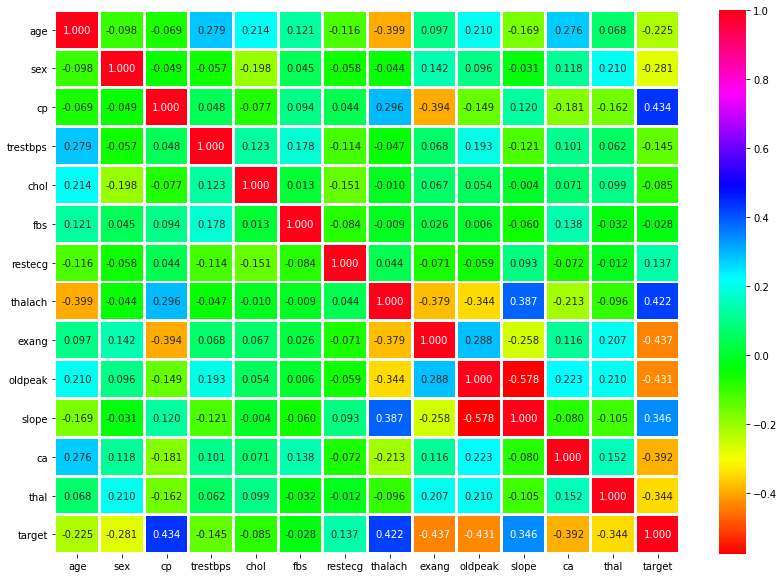

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (14, 10))
sns.heatmap(data.corr(), annot = True, cmap = 'hsv', fmt = '.3f', linewidths = 2)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


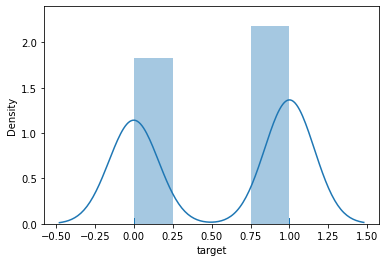

In [ ]:
sns.distplot(data['target'], rug = True)
plt.show()

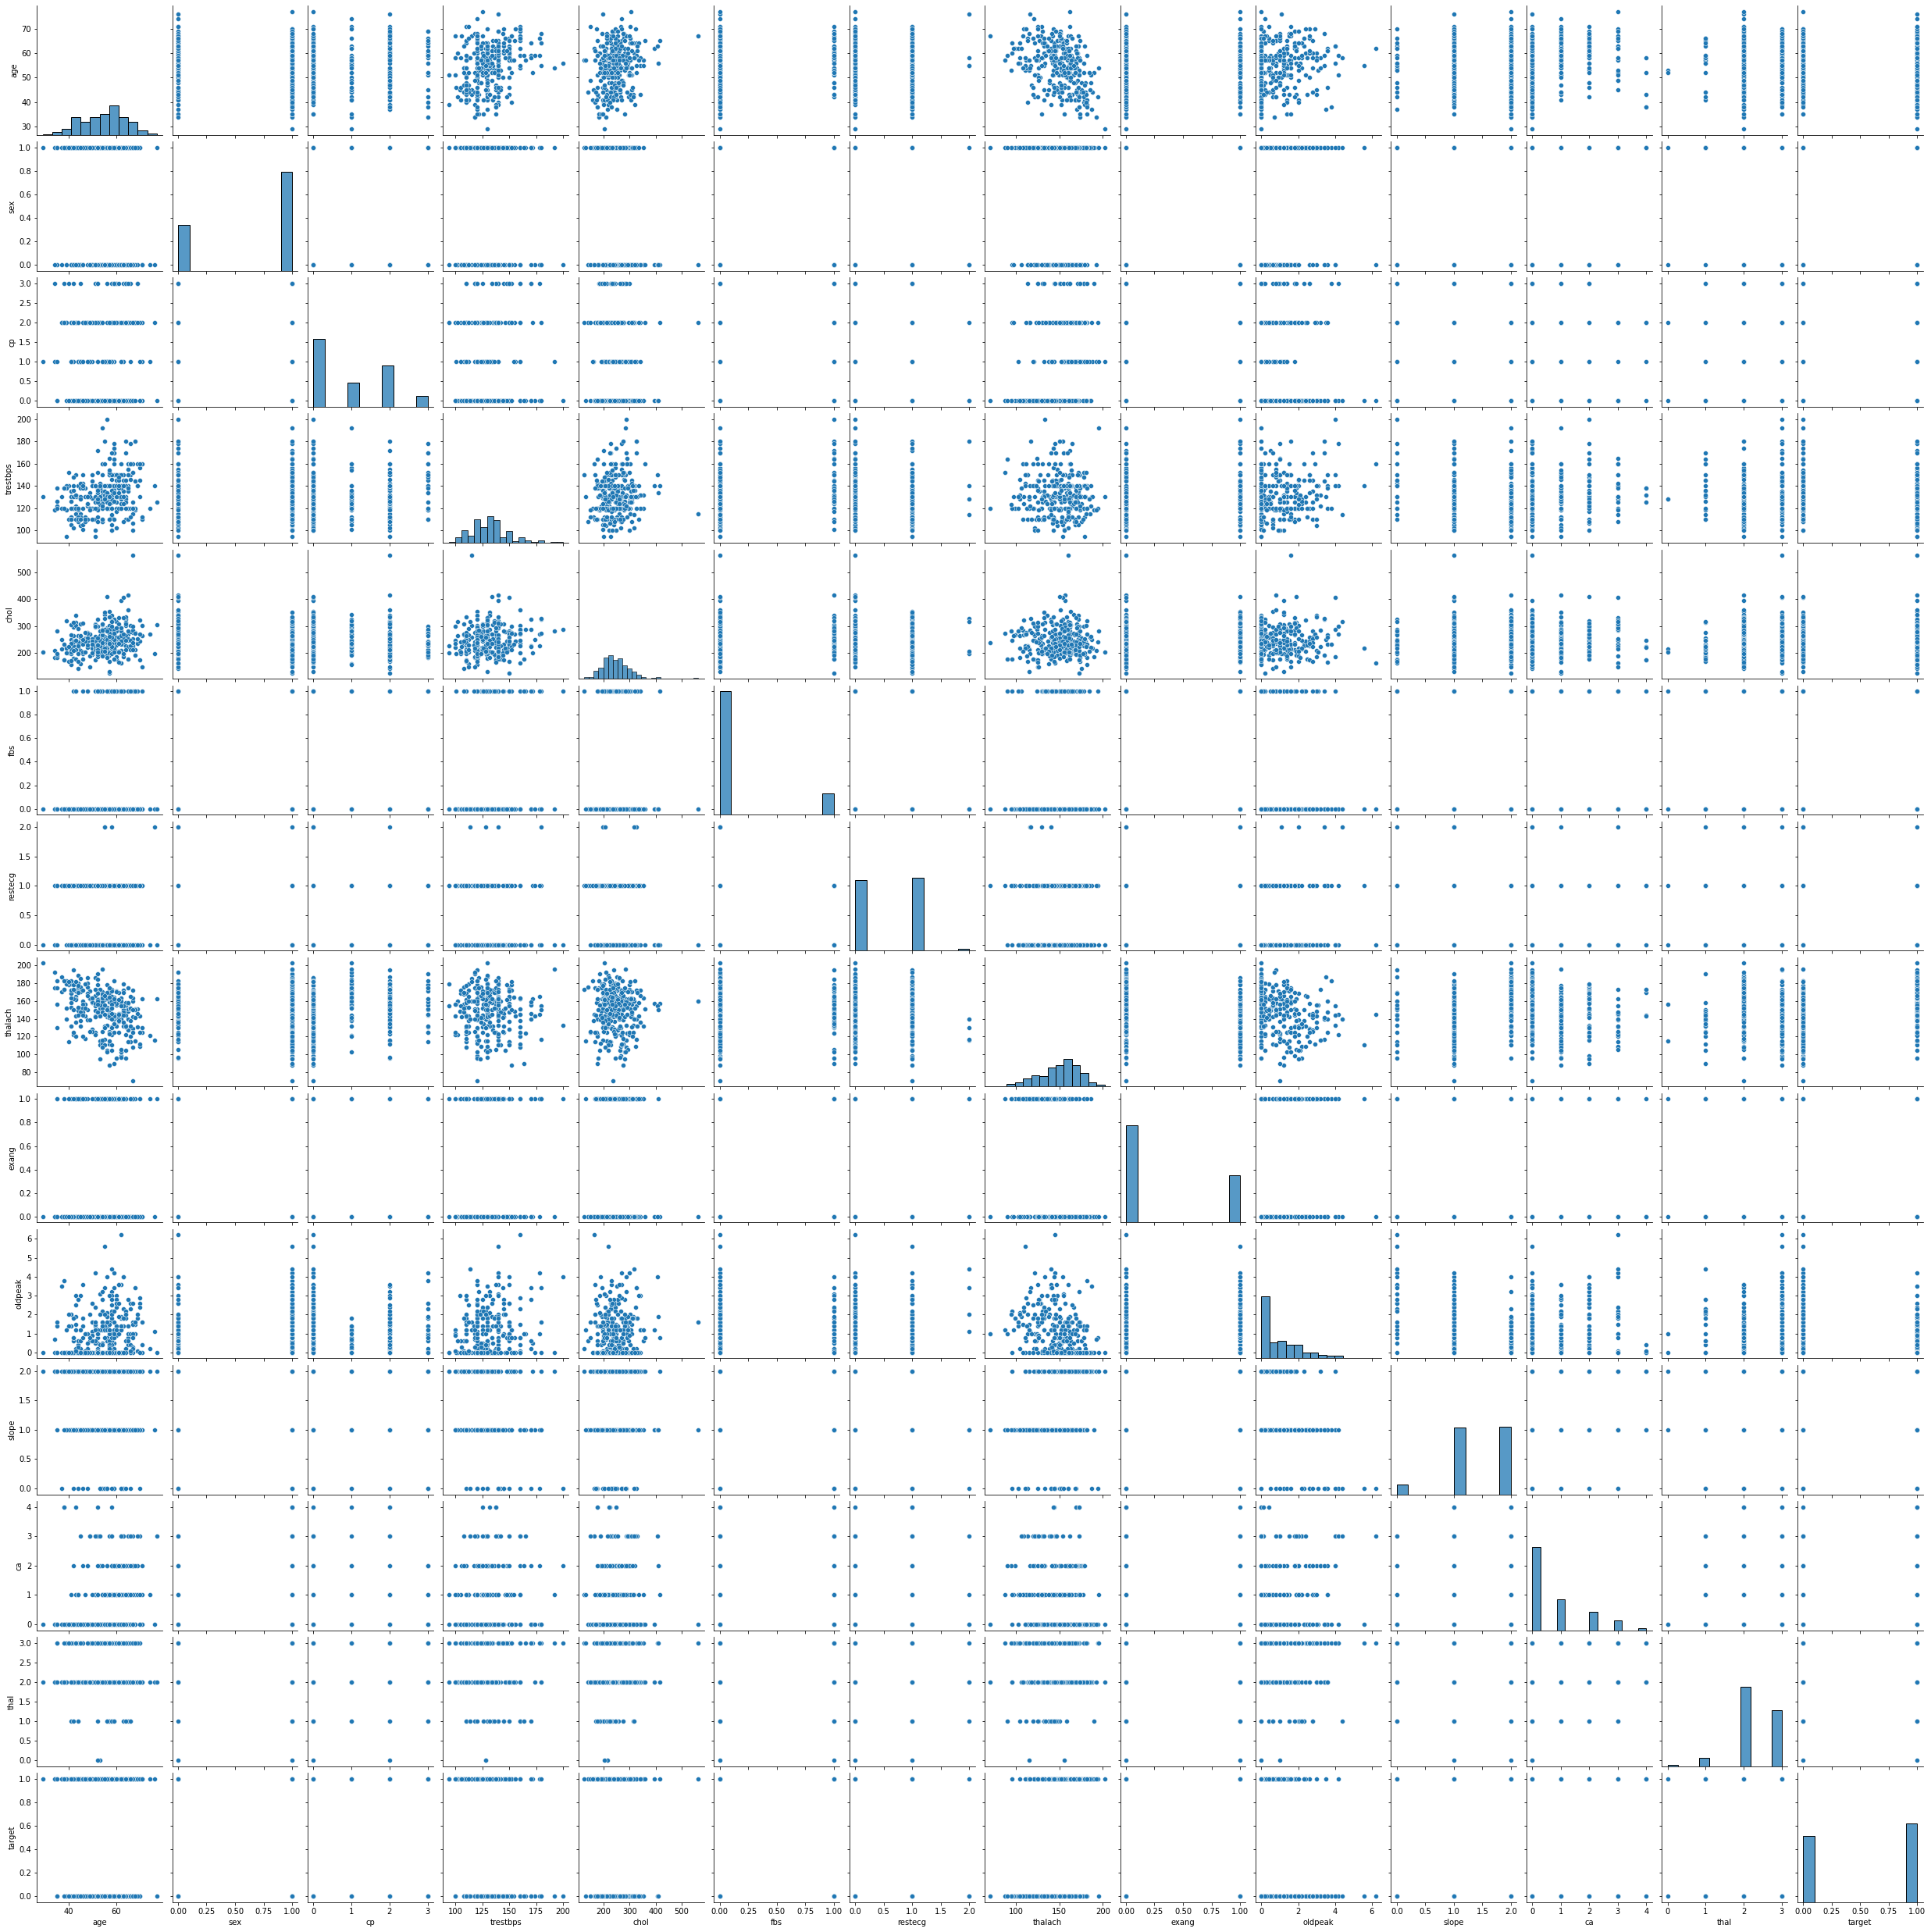

In [ ]:
sns.pairplot(data)

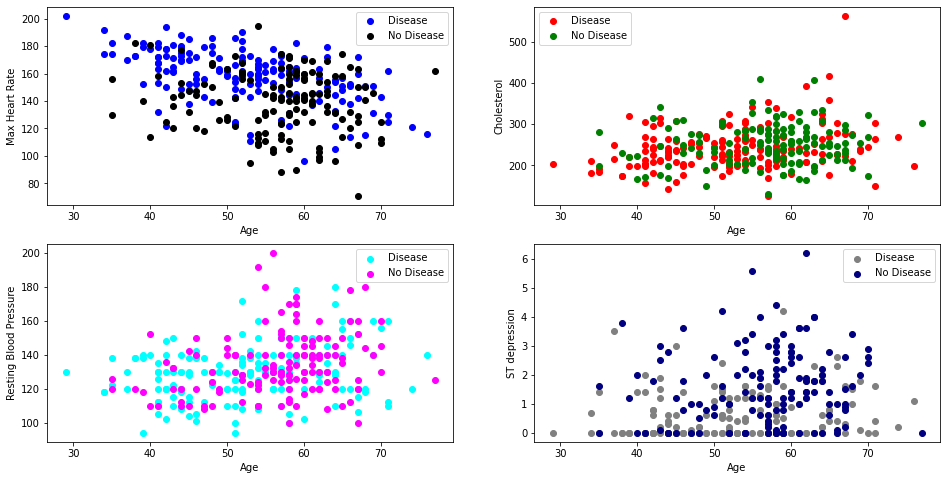

In [ ]:
plt.figure(figsize = (16, 8))
plt.subplot(2, 2, 1)
plt.scatter(x = data.age[data.target == 1], y = data.thalach[data.target == 1], c = 'blue')
plt.scatter(x = data.age[data.target == 0], y = data.thalach[data.target == 0], c = 'black')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease'])
    
plt.subplot(2, 2, 2)
plt.scatter(x = data.age[data.target == 1], y = data.chol[data.target == 1], c = 'red')
plt.scatter(x = data.age[data.target == 0], y = data.chol[data.target == 0], c = 'green')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(['Disease', 'No Disease'])

plt.subplot(2, 2, 3)
plt.scatter(x = data.age[data.target == 1], y = data.trestbps[data.target == 1], c = 'cyan')
plt.scatter(x = data.age[data.target == 0], y = data.trestbps[data.target == 0], c = 'fuchsia')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.legend(['Disease', 'No Disease'])

plt.subplot(2, 2, 4)
plt.scatter(x = data.age[data.target == 1], y = data.oldpeak[data.target == 1], c = 'grey')
plt.scatter(x = data.age[data.target == 0], y = data.oldpeak[data.target == 0], c = 'navy')
plt.xlabel('Age')
plt.ylabel('ST depression')
plt.legend(['Disease', 'No Disease'])
plt.show()




In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(['target'], axis = 1)
y = data.target.values
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Classification Model

### Define Keras Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(32, input_dim = 13, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

**Compile Keras Model**

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

**Fit Keras Model**

In [ ]:
# Fit the Keras model on the dataset
model.fit(X_train, Y_train, epochs = 150, batch_size = 10)

Epoch 1/150
25/25 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.5323
Epoch 2/150
25/25 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5416
Epoch 3/150
25/25 [==============================] - 0s 1ms/step - loss: 0.6852 - accuracy: 0.7217
Epoch 4/150
25/25 [==============================] - 0s 1ms/step - loss: 0.6473 - accuracy: 0.8155
Epoch 5/150
25/25 [==============================] - 0s 1ms/step - loss: 0.5192 - accuracy: 0.8818
Epoch 6/150
25/25 [==============================] - 0s 3ms/step - loss: 0.4032 - accuracy: 0.8648
Epoch 7/150
25/25 [==============================] - 0s 2ms/step - loss: 0.3482 - accuracy: 0.8524
Epoch 8/150
25/25 [==============================] - 0s 2ms/step - loss: 0.3136 - accuracy: 0.8525
Epoch 9/150
25/25 [==============================] - 0s 1ms/step - loss: 0.3927 - accuracy: 0.8228
Epoch 10/150
25/25 [==============================] - 0s 1ms/step - loss: 0.3352 - accuracy: 0.8553
Epoch 11/

**Evaluate the Keras model**

In [ ]:
# Evaluate the Keras model
_, accuracy = model.evaluate(X_train, Y_train)
print('Accuracy: %.2f' % (accuracy*100))

8/8 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000
Accuracy: 100.00


In [ ]:
# Predicting the Test set results
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([[3.5977857e-05],
       [6.7870891e-01],
       [9.9998486e-01],
       [2.3357704e-06],
       [1.8288881e-02],
       [5.9899986e-03],
       [5.2385330e-03],
       [3.7535563e-05],
       [1.2466448e-14],
       [1.5562723e-11],
       [9.9999785e-01],
       [9.9999005e-01],
       [3.6755378e-06],
       [9.9991488e-01],
       [1.0000000e+00],
       [4.6246555e-01],
       [6.3941147e-06],
       [9.9999666e-01],
       [1.8386771e-05],
       [1.0000000e+00],
       [9.9996412e-01],
       [2.6082993e-04],
       [5.2866340e-04],
       [6.7694902e-02],
       [8.0147636e-01],
       [9.9929667e-01],
       [1.2360810e-05],
       [2.6823580e-03],
       [1.0000000e+00],
       [6.8094820e-02],
       [9.9364126e-01],
       [5.9674435e-06],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9999833e-01],
       [1.8003583e-04],
       [2.3301016e-06],
       [9.9975246e-01],
       [1.7017774e-08],
       [1.1309326e-02],
       [9.9999911e-01],
       [2.878814

In [ ]:
y_pred = y_pred.round()

Accuracy of the model:  0.819672131147541


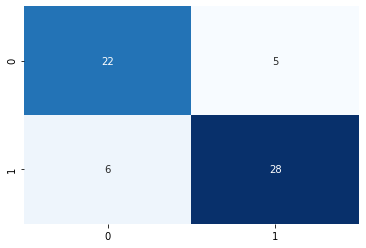

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred.round())
sns.heatmap(cm, annot = True, cmap = "Blues", fmt="d", cbar = False)

# Accuracy score
from sklearn.metrics import accuracy_score
ac = accuracy_score(Y_test, y_pred.round())
print('Accuracy of the model: ', ac)

## XGBoost vs Neural Network Classifier

In [ ]:
from xgboost import XGBClassifier

# Inicialize XGBoost
model = XGBClassifier(max_depth = 50, min_child_weigth = 1, n_estimators = 200, n_jobs = -1, verbose = 1, learning_rate = 0.16)

# Add silent=True to avoid printing out updates with each cycle
model.fit(X_train, Y_train)

# Make prediction
y_pred_xgb = model.predict(X_test)

Accuracy of the model:  0.7868852459016393


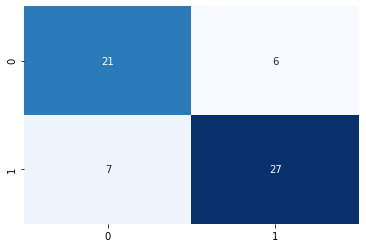

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred_xgb)
sns.heatmap(cm, annot = True, cmap = "Blues", fmt = "d", cbar = False)

# Accuracy score
from sklearn.metrics import accuracy_score
ac = accuracy_score(Y_test, y_pred_xgb)
print('Accuracy of the model: ', ac)

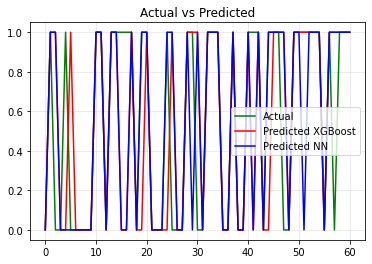

In [ ]:
# Visualising the actual and predicted result
plt.plot(Y_test, color = 'green', label = 'Actual')
plt.plot(y_pred_xgb, color = 'red', label = 'Predicted XGBoost')
plt.plot(y_pred, color = 'blue', label = 'Predicted NN')

plt.grid(alpha = 0.3)
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

# Regression using Neural Networks

**First dataset**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Admission_Predict.csv')

In [ ]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
data = data.drop('Serial No.', axis = 1)

In [ ]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


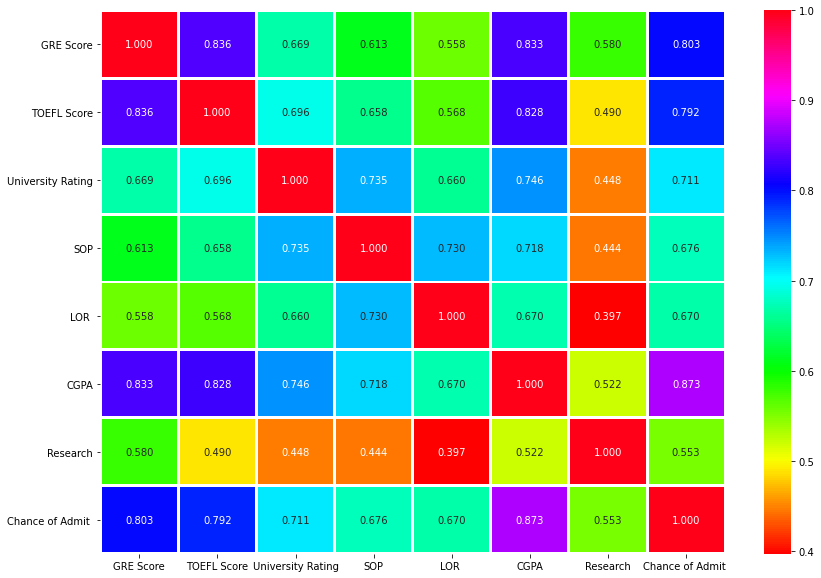

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (14, 10))
sns.heatmap(data.corr(), annot = True, cmap = 'hsv', fmt = '.3f', linewidths=2)
plt.show()

In [ ]:
import numpy as np

X = np.asarray(data.drop('Chance of Admit ', axis = 1))
Y = np.asarray(data['Chance of Admit '])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Regression Model

### Define Keras Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential()

model.add(Dense(16, input_dim = 7, activation = 'relu'))
model.add(Dropout(0.2, input_shape = (16, )))
model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.2, input_shape = (8, )))
model.add(Dense(1, activation = 'linear'))

**Compile Keras Model**

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

**Fit Keras Model**

In [ ]:
history = model.fit(X_train, Y_train, epochs = 30, batch_size=10, verbose = 1, validation_split=0.2)

Epoch 1/30
26/26 [==============================] - 1s 9ms/step - loss: 0.3870 - val_loss: 0.1710
Epoch 2/30
26/26 [==============================] - 0s 3ms/step - loss: 0.2843 - val_loss: 0.1339
Epoch 3/30
26/26 [==============================] - 0s 3ms/step - loss: 0.2597 - val_loss: 0.1127
Epoch 4/30
26/26 [==============================] - 0s 3ms/step - loss: 0.1787 - val_loss: 0.0868
Epoch 5/30
26/26 [==============================] - 0s 3ms/step - loss: 0.1672 - val_loss: 0.0719
Epoch 6/30
26/26 [==============================] - 0s 3ms/step - loss: 0.1256 - val_loss: 0.0558
Epoch 7/30
26/26 [==============================] - 0s 3ms/step - loss: 0.1169 - val_loss: 0.0478
Epoch 8/30
26/26 [==============================] - 0s 3ms/step - loss: 0.1045 - val_loss: 0.0364
Epoch 9/30
26/26 [==============================] - 0s 3ms/step - loss: 0.0830 - val_loss: 0.0359
Epoch 10/30
26/26 [==============================] - 0s 3ms/step - loss: 0.0856 - val_loss: 0.0300
Epoch 11/30
26/26 [

In [ ]:
y_pred = model.predict(X_test)

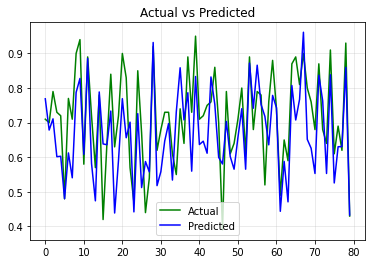

In [ ]:
# Visualising the actual and predicted result
plt.plot(Y_test, color = 'green', label = 'Actual')
plt.plot(y_pred, color = 'blue', label = 'Predicted')
plt.grid(alpha = 0.3)
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
print('r_square score: ', r2_score(Y_test, y_pred))

r_square score:  0.3965569413204717


**Second dataset**

In [ ]:
import pandas as pd
import numpy as np
train = pd.read_csv('/content/drive/MyDrive/traindataset5.csv')

In [ ]:
X_train = train.iloc[:,1:-206]
Y_train = train.iloc[:,-206:-1]

In [ ]:
train.shape

(7613, 5)

In [ ]:
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
